# Bloch Sphere with colorbar

In [1]:
import matplotlib as mpl
import numpy as np
from matplotlib import cm
from qutip import Bloch, about, basis, destroy, sesolve, sigmax, sigmay, sigmaz

%matplotlib inline

C:\Users\A_SAU\Anaconda3\envs\Rydberg\lib\site-packages\qutip\__init__.py:65: UserWarning: The new version of Cython, (>= 3.0.0) is not supported.
  warnings.warn(


## Do a closed Landau-Zener Evolution

In [2]:
delta = 0.5 * 2 * np.pi
v = 2.0 * 2 * np.pi  # sweep rate

H0 = delta / 2.0 * sigmax()
H1 = v / 2.0 * sigmaz()
H = [H0, [H1, "t"]]
psi0 = basis(2, 0)

sm = destroy(2)
sx = sigmax()
sy = sigmay()
sz = sigmaz()
expt_ops = [sm.dag() * sm, sx, sy, sz]


tlist = np.linspace(-10.0, 10.0, 1500)
expt_list = sesolve(H, psi0, tlist, expt_ops).expect

## Generate a Bloch Sphere with Multi-Colored Points

Note that I need to call `b.show` here so that I can grab a Figure instance later

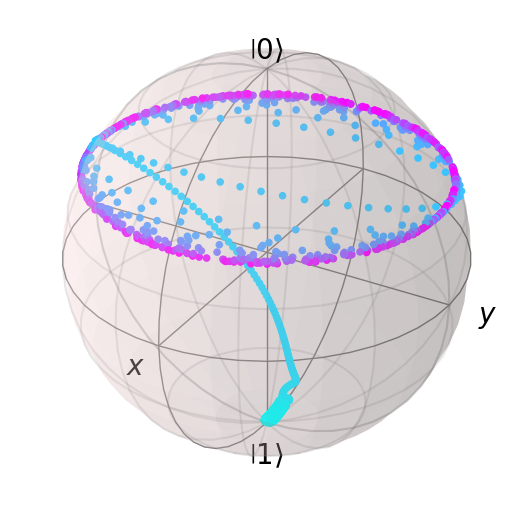

In [3]:
b = Bloch()
# normalize colors to times in tlist ##
nrm = mpl.colors.Normalize(-2, 10)
colors = cm.cool(nrm(tlist))

# add data points from expectation values ##
b.add_points([expt_list[1], expt_list[2], -expt_list[3]], "m")

# customize sphere properties ##
b.point_color = list(colors)
b.point_marker = ["o"]
b.point_size = [20]

b.zlpos = [1.1, -1.2]

b.show()

## Add  New Axis to Bloch Figure

In [4]:
left, bottom, width, height = [0.98, 0.05, 0.05, 0.9]
ax2 = b.fig.add_axes([left, bottom, width, height])

mpl.colorbar.ColorbarBase(ax2, cmap=cm.cool, norm=nrm, orientation="vertical");

## Plot with Colorbar Added

Currently I need to call `b.fig` as replotting figures in a notebook is a bit tricky.  However, this is likely to be improved in the future.

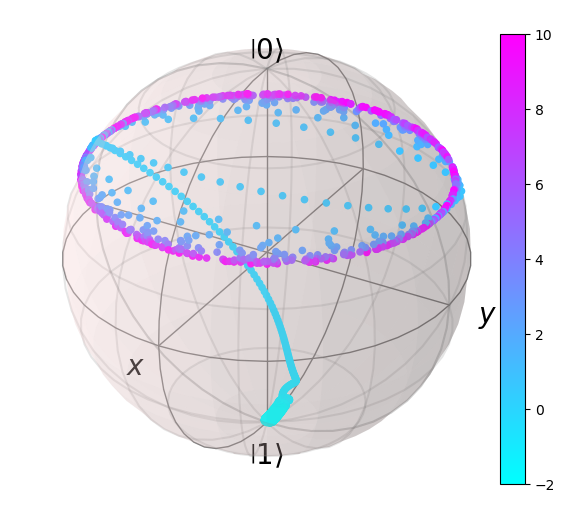

In [5]:
b.fig

In [6]:
about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Current admin team: Alexander Pitchford, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, Eric Giguère, Boxi Li, Jake Lishman, Simon Cross and Asier Galicia.
Board members: Daniel Burgarth, Robert Johansson, Anton F. Kockum, Franco Nori and Will Zeng.
Original developers: R. J. Johansson & P. D. Nation.
Previous lead developers: Chris Granade & A. Grimsmo.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      4.7.1
Numpy Version:      1.22.4
Scipy Version:      1.8.1
Cython Version:     0.29.33
Matplotlib Version: 3.5.2
Python Version:     3.10.4
Number of CPUs:     2
BLAS Info:          Generic
OPENMP Installed:   False
INTEL MKL Ext:      False
Platform Info:      Linux (x86_64)
Installation path:  /home/runner/work/qutip-tutorials/qutip-tutorials/qutip/qutip
Please cite QuTiP in your publication.
For your convenience a bibtex reference can be easily gene

In [11]:
expt_list[3][1000:1100]

array([-0.49733768, -0.4936793 , -0.47074605, -0.43562392, -0.39930519,
       -0.37328143, -0.36588669, -0.37955991, -0.40994585, -0.44719097,
       -0.47908195, -0.49504762, -0.48971609, -0.46481463, -0.42871286,
       -0.39368719, -0.3717726 , -0.37059309, -0.39062569, -0.42490673,
       -0.46136375, -0.48702611, -0.49266234, -0.47618025, -0.44351161,
       -0.40657688, -0.37898929, -0.37102546, -0.38572341, -0.41761535,
       -0.45465858, -0.4827253 , -0.49100166, -0.47623065, -0.44410747,
       -0.40719179, -0.3800571 , -0.37352529, -0.39027077, -0.42360954,
       -0.4600608 , -0.48474577, -0.48748522, -0.46708926, -0.43199651,
       -0.3968871 , -0.37658302, -0.37975144, -0.40510097, -0.44178194,
       -0.47393829, -0.48754369, -0.47658482, -0.4458402 , -0.40892197,
       -0.38232314, -0.378039  , -0.39806673, -0.43334448, -0.46774021,
       -0.48538877, -0.47806098, -0.44912094, -0.41211667, -0.38452425,
       -0.37949166, -0.39948252, -0.43493403, -0.46871471, -0.48